In [64]:

import torch
import numpy as np
import matplotlib.pyplot as plt


In [65]:
D1=torch.normal(0.0, 1.0,size=[500,2])
D2=torch.normal(7.2, 1.0,size=[500,2])

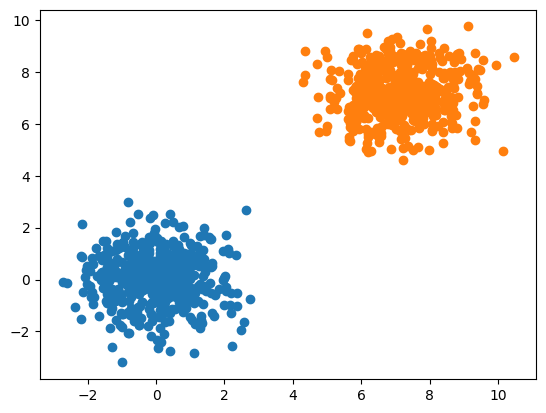

In [66]:
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])

In [67]:
X=torch.empty(1000,D1.size(1)+1).fill_(1)
X[::2,:2] = D1
X[1::2,:2] = D2

Y=torch.empty(1000,1)
Y[::2,:2] = 1.0
Y[1::2,:2] = -1.0

In [68]:
W = torch.zeros(X.size(1))

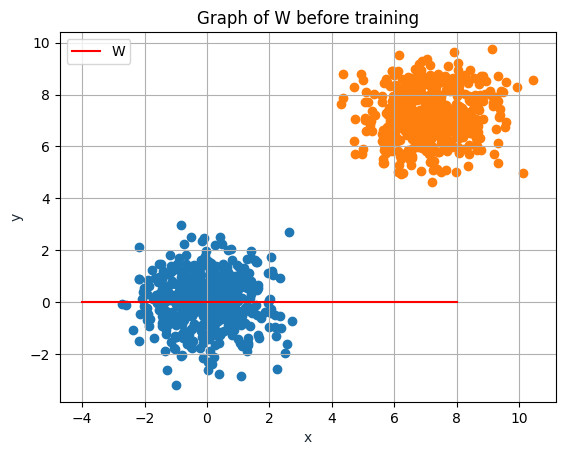

In [69]:
x = np.linspace(-4,8,500)
y = np.zeros(500,) 
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()

In [70]:
def train_perceptron(x, y, w, max_iter):  
  for e in range(max_iter):
    misclassify = 0
    for i in range(x.size(0)):
      if x[i].dot(w) * y[i] <= 0:
        w = w + y[i] * x[i]
        misclassify = misclassify + 1
    if misclassify == 0:
        break
  return w
  

Level of separability =  0


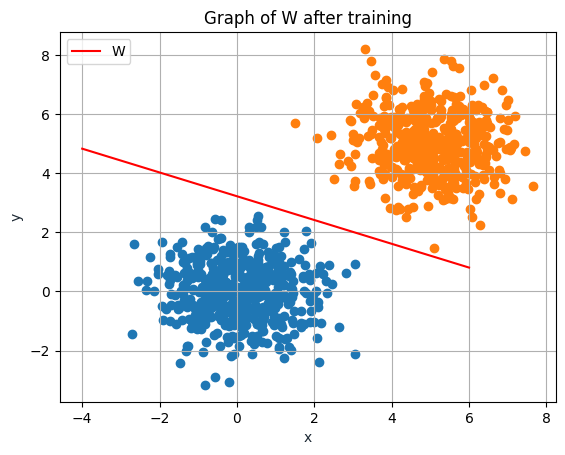

Level of separability =  1


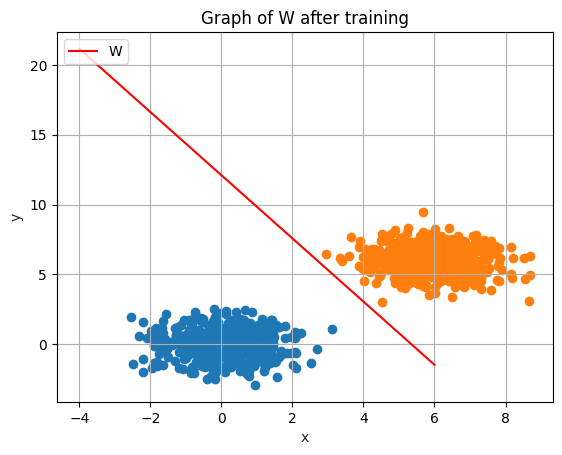

Level of separability =  2


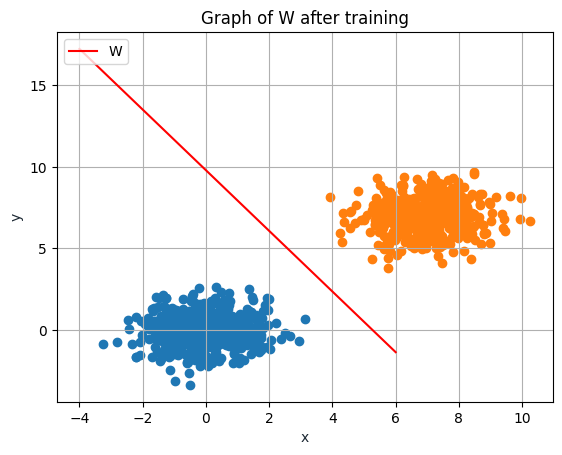

Level of separability =  3


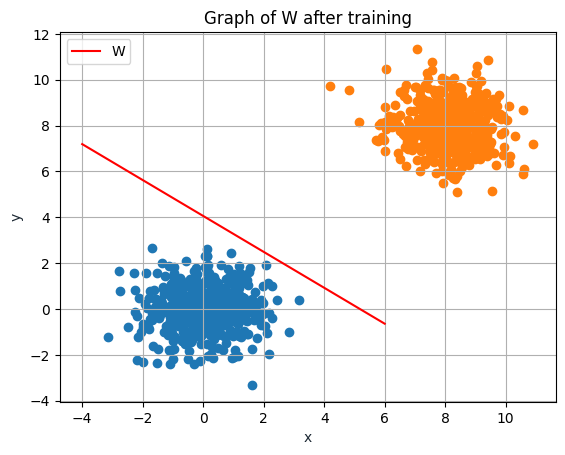

Level of separability =  4


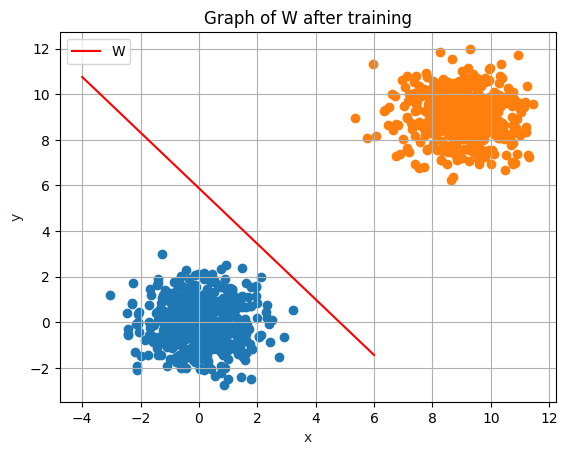

In [72]:
for i in range(5):
    D1=torch.normal(0.0, 1.0,size=[500,2])
    D2=torch.normal(5.0+i, 1.0,size=[500,2])
    X=torch.empty(1000,D1.size(1)+1).fill_(1)
    X[::2,:2] = D1
    X[1::2,:2] = D2

    Y=torch.empty(1000,1)
    Y[::2,:2] = 1.0
    Y[1::2,:2] = -1.0
    W = torch.zeros(X.size(1))
    W = train_perceptron(X,Y,W,100)
    
    x = np.linspace(-4,6,1000)
    y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
    plt.plot(x, y, '-r', label='W')
    print('Level of separability = ',i)
    plt.title('Graph of W after training')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.legend(loc='upper left')
    plt.scatter(D1[:,0], D1[:,1])
    plt.scatter(D2[:,0], D2[:,1])
    plt.grid()
    plt.show()